In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

In [2]:
plt.rc('font', family = 'malgun gothic')
plt.style.use('ggplot')

# 베르누이 분포 

Text(0.5, 0.98, '베르누이 분포')

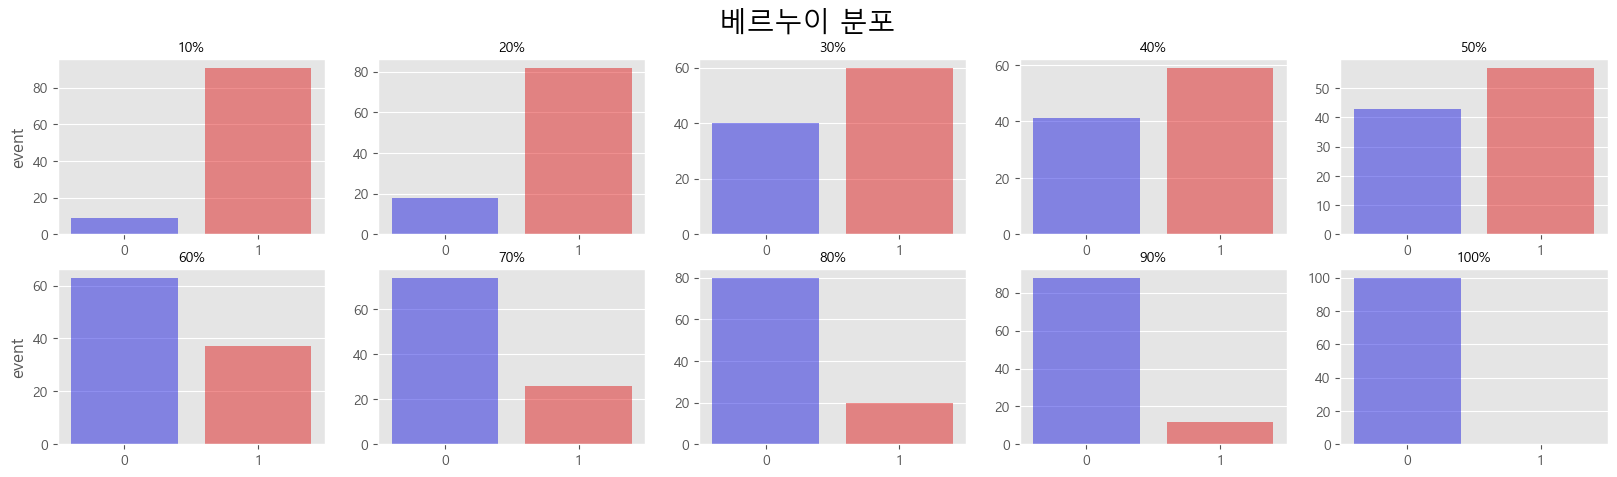

In [3]:
n = 100 # 100번 시행할 때 
p_list = np.arange(0.1,1.1,0.1) # 사건이 발생할 확률이 0.1 부터 1까지

colors = ["#0000FF","#FF0000"]

fig,ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,5))
ax = ax.flatten()
for i,p in enumerate(p_list):
    
    negative = 0
    positive = 0
    
    for _ in range(n): # 100번 시행 
        if np.random.uniform() > p: # 확률 p 보다 높으면 양성 횟수 1 증가
            positive += 1
        else: # 확률 p 보다 낮으면 음성 횟수 1 증가
            negative += 1
    
    result = pd.DataFrame({'class':[0,1],
                    'event':[negative,positive]})
        
    sns.barplot(data = result,
                    x = 'class',
                    y = 'event',
                    palette = colors,
                    alpha = 0.5,
                    ax = ax[i])
    
    if i % 5 != 0:
        ax[i].set_ylabel('')    
    ax[i].set_xlabel('')
    ax[i].set_title(f'{int(p*100)}%', fontsize = 10)
fig.suptitle('베르누이 분포', fontsize = 20)

# 이항 분포 

Text(0.5, 1.0, '100번 시도 했을 때 성공할 사건 확률 분포표')

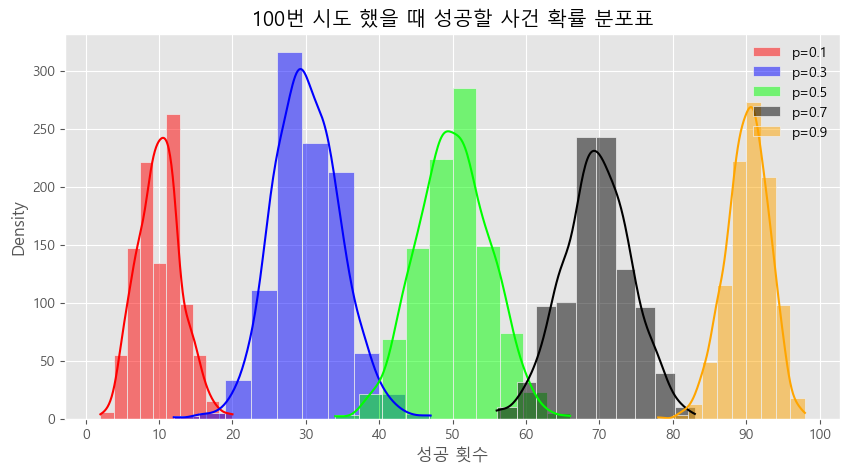

In [5]:
n = 100 # 시행 횟수
p_list = np.arange(0.1,1,0.2) # 사건 k 의 확률

colors = ["#FF0000", "#0000FF", "#00FF00", "#000000", "#FFA500"]

fig, ax = plt.subplots(figsize = (10,5))

for i, p in enumerate(p_list):
    
    dist = binom(n, p)
    
    # k 번 발생하는 빈도수 샘플 생성
    freq = np.random.binomial(n, p, size=1000)
    
    # k 번 발생하는 빈도수에 대한 KDE 플롯 생성
    sns.histplot(freq, ax=ax, label=f'p={round(p,1)}', kde = True,
                    color = colors[i],bins =10)
ax.legend(loc = 'upper right', fontsize = 10, frameon = False)
ax.set_xlabel('성공 횟수')
ax.set_ylabel('Density')
ax.set_xticks(np.arange(0,110,10))
ax.set_title('100번 시도 했을 때 성공할 사건 확률 분포표')

# 실전 프로토타입 만들기 

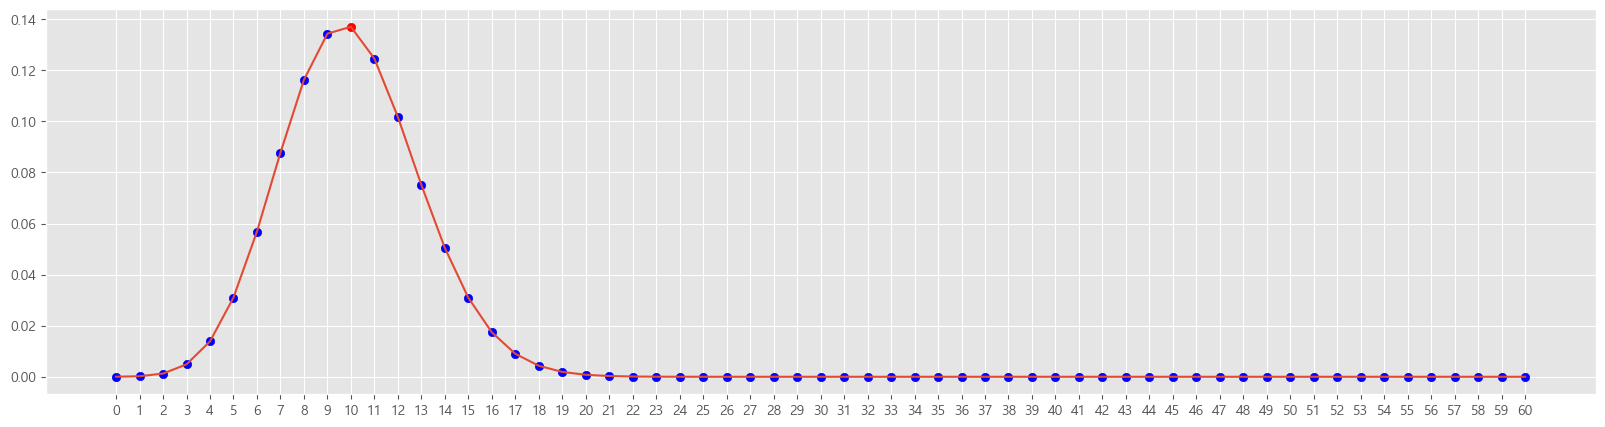

In [46]:
n = 60 # 게임 횟수
p = 1/6 # 오리 확률
k = np.arange(0,n+1) # 오리가 걸릴 사건은 0번부터 n 번까지

prob = binom.pmf(k,n,p)

plt.figure(figsize = (20,5))
plt.plot(k,prob)

for i,var in enumerate(k):
    if prob[i] == np.max(prob):
        plt.scatter(var,prob[i],color = 'red')
    else:
        plt.scatter(var,prob[i],color = 'blue')
        
plt.xticks(k);

* 내가 만약 10번의 게임 중 2번 오리가 걸렸다고 해보자 
* 그 때 내 앞에 나보다 운이 좋은 player의 수를 어떻게 알 수 있을까?

C:\Users\whileduck\AppData\Local\Temp\ipykernel_23400\972108401.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(_ * 100)) + '%' for _ in ax.get_yticks()]);


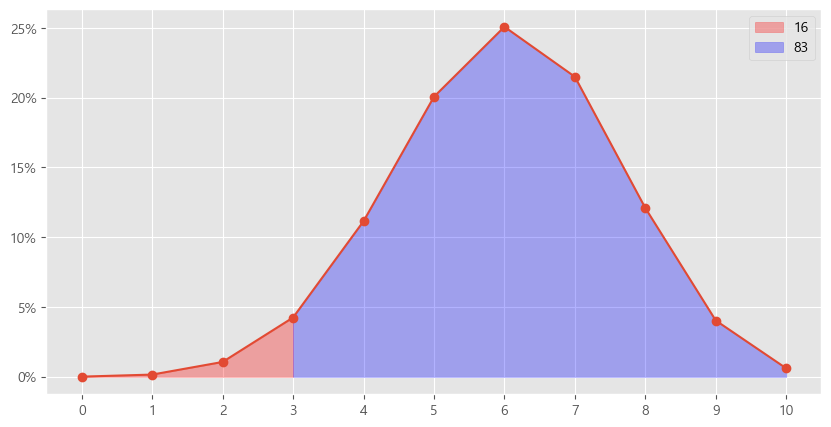

In [151]:
# binom.cdf(성공 횟수, 총 사건 수 , 확률) 
# binom.cdf 는 0부터 성공 횟수 까지의 확률 밀도 함수 값을 return 시켜줌 (누적 분포)

n = 10
k = 3
p = 0.6

prob = binom.cdf(k,n,p) # 나보다 운이 안좋은 플레이어들 k가 0,1,2 인 누적 확률 밀도 함수 
neg_prob = 1-prob # 나보다 운이 좋은 플레이어들, k가 3 이상인 누적 확률 밀도 함수

total_probs = binom.pmf(np.arange(n+1),n,p)

fig,ax = plt.subplots(figsize = (10,5))

ax.plot(range(n+1), total_probs, marker = 'o')

x1 = np.arange(0, k+1)
y1 = binom.pmf(x1, n, p)
neg_prob = binom.cdf(k+1,n,p)

x2 = np.arange(k, n+1)
y2 = binom.pmf(x2, n, p)
posi_prob = 1 - neg_prob

ax.fill_between(x1, y1, color='red', alpha = 0.3, label = int(neg_prob * 100))
ax.fill_between(x2, y2, color='blue', alpha = 0.3, label = int(posi_prob * 100),interpolate = True,)
ax.set_xticks(range(n+1));
ax.set_yticklabels([str(int(_ * 100)) + '%' for _ in ax.get_yticks()]);
ax.legend()

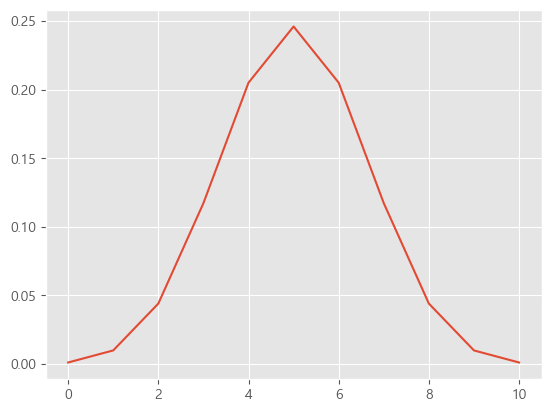

In [125]:
import scipy.stats as stats
import pandas as pd

# Define parameters
n = 10   # number of trials
p = 0.5  # probability of success

# Calculate probabilities for k successes
k_values = range(0, n+1)
probabilities = [stats.binom.pmf(k, n, p) for k in k_values]

# Create table
data = {'k': k_values, 'P': probabilities}
table = pd.DataFrame(data)

plt.plot(data['k'],data['P'])


Text(0, 0.5, '성공 도수')

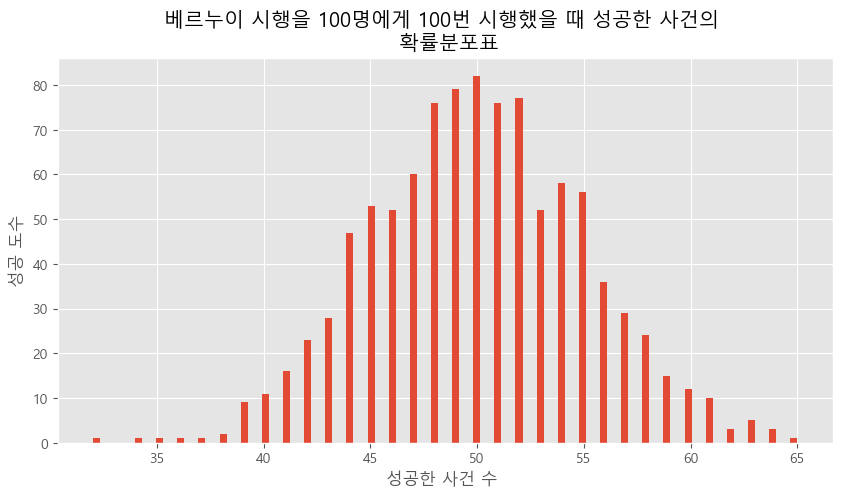

In [17]:
prob = 0.5 
person = 1000 # 사람 수
play = 100 # 시행 횟수 

freq = []

for n in range(person):
    
    success = 0
    
    for p in range(play):
        if np.random.uniform() > prob : # 무작위 시행이 성공 할 경우
            success += 1
        else:
            continue
        
    freq.append(success)
    
plt.figure(figsize = (10,5))
plt.hist(freq, bins = 100);
plt.title('베르누이 시행을 100명에게 100번 시행했을 때 성공한 사건의 \n 확률분포표')
plt.xlabel('성공한 사건 수 ')
plt.ylabel('성공 도수')